In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)})
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("first_Train.csv")

In [4]:
df["id_x_date"].value_counts().head()

1RYCZPT X 2020-02-24    1
URSY7IS X 2020-01-28    1
QHM3GGJ X 2020-01-12    1
E7N9S0X X 2020-01-11    1
SI12552 X 2020-01-06    1
Name: id_x_date, dtype: int64

In [5]:
df.id.unique

<bound method Series.unique of 0        010Q650
1        010Q650
2        010Q650
3        010Q650
4        010Q650
          ...   
30552    YWSFY6Q
30553    YWSFY6Q
30554    YWSFY6Q
30555    YWSFY6Q
30556    YWSFY6Q
Name: id, Length: 30557, dtype: object>

In [6]:
n_records = len(df)

def duplicate_values_col(df):
    for column in df:
        column_counts = df[column].value_counts()
        most_common = column_counts.iloc[0]
        least_common = column_counts.iloc[-1]
        print("{}({}) | COMMON: {:.2f}%| UNCOMMON:{} observation/s".format(
            df[column].name,
            df[column].dtype,
            100 * most_common / (1.0 * n_records),
            least_common,
        ))

duplicate_values_col(df)

Unnamed: 0(int64) | COMMON: 0.00%| UNCOMMON:1 observation/s
id_x_date(object) | COMMON: 0.00%| UNCOMMON:1 observation/s
Date(object) | COMMON: 1.09%| UNCOMMON:316 observation/s
id(object) | COMMON: 0.31%| UNCOMMON:3 observation/s
target(float64) | COMMON: 3.82%| UNCOMMON:1 observation/s
target_min(float64) | COMMON: 16.98%| UNCOMMON:1 observation/s
target_max(float64) | COMMON: 1.67%| UNCOMMON:1 observation/s
target_variance(float64) | COMMON: 0.17%| UNCOMMON:1 observation/s
target_count(int64) | COMMON: 13.87%| UNCOMMON:1 observation/s
precipitation(float64) | COMMON: 0.36%| UNCOMMON:1 observation/s
rel_humidity(float64) | COMMON: 0.18%| UNCOMMON:1 observation/s
spec_humidity(float64) | COMMON: 0.09%| UNCOMMON:1 observation/s
temp(float64) | COMMON: 0.01%| UNCOMMON:1 observation/s
u_wind(float64) | COMMON: 0.02%| UNCOMMON:1 observation/s
v_wind(float64) | COMMON: 0.02%| UNCOMMON:1 observation/s
L3_NO2_NO2_column_number_density(float64) | COMMON: 8.54%| UNCOMMON:1 observation/s
L3_NO2_

In [7]:
df.shape

(30557, 85)

In [8]:
df = df.drop(["L3_CLOUD_cloud_base_height", "L3_CLOUD_cloud_base_pressure", "L3_CLOUD_cloud_top_height", "L3_CLOUD_cloud_top_pressure", \
             "L3_CLOUD_sensor_azimuth_angle", "L3_CLOUD_sensor_zenith_angle", "L3_CLOUD_solar_azimuth_angle", "L3_CLOUD_solar_zenith_angle", \
             "L3_CLOUD_surface_albedo"], axis = 1)

In [9]:
n_records = len(df)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(df)

Unnamed: 0 | 0.0 | int64
id_x_date | 0.0 | object
Date | 0.0 | object
id | 0.0 | object
target | 0.0 | float64
target_min | 0.0 | float64
target_max | 0.0 | float64
target_variance | 0.0 | float64
target_count | 0.0 | int64
precipitation | 0.0 | float64
rel_humidity | 0.0 | float64
spec_humidity | 0.0 | float64
temp | 0.0 | float64
u_wind | 0.0 | float64
v_wind | 0.0 | float64
L3_NO2_NO2_column_number_density | 0.07163661354190529 | float64
L3_NO2_NO2_slant_column_number_density | 0.07163661354190529 | float64
L3_NO2_absorbing_aerosol_index | 0.07163661354190529 | float64
L3_NO2_cloud_fraction | 0.07163661354190529 | float64
L3_NO2_sensor_altitude | 0.07163661354190529 | float64
L3_NO2_sensor_azimuth_angle | 0.07166933926759826 | float64
L3_NO2_sensor_zenith_angle | 0.07166933926759826 | float64
L3_NO2_solar_azimuth_angle | 0.07166933926759826 | float64
L3_NO2_solar_zenith_angle | 0.07166933926759826 | float64
L3_NO2_stratospheric_NO2_column_number_density | 0.07166933926759826 | float

In [10]:
df = df.drop(["L3_CH4_CH4_column_volume_mixing_ratio_dry_air", "L3_CH4_aerosol_height", "L3_CH4_aerosol_optical_depth", \
             "L3_CH4_sensor_azimuth_angle", "L3_CH4_sensor_zenith_angle", "L3_CH4_solar_azimuth_angle", "L3_CH4_solar_zenith_angle"], \
            axis = 1)

In [11]:
df.head()

,Unnamed: 0,id_x_date,Date,id,target,target_min,target_max,target_variance,target_count,precipitation,...,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,month,day
0,0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,...,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665,1,2
1,1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,...,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804,1,3
2,2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,...,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977,1,4
3,3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,...,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446,1,5
4,4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,...,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694,1,6


In [12]:
def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(df)

Unnamed: 0 | 0 | int64
target | 255 | float64
target_min | 702 | float64
target_max | 584 | float64
target_variance | 130 | float64
target_count | 619 | int64
precipitation | 466 | float64
rel_humidity | 67 | float64
spec_humidity | 346 | float64
temp | 143 | float64
u_wind | 398 | float64
v_wind | 320 | float64
L3_NO2_NO2_column_number_density | 0 | float64
L3_NO2_NO2_slant_column_number_density | 0 | float64
L3_NO2_absorbing_aerosol_index | 0 | float64
L3_NO2_cloud_fraction | 0 | float64
L3_NO2_sensor_altitude | 0 | float64
L3_NO2_sensor_azimuth_angle | 0 | float64
L3_NO2_sensor_zenith_angle | 0 | float64
L3_NO2_solar_azimuth_angle | 0 | float64
L3_NO2_solar_zenith_angle | 0 | float64
L3_NO2_stratospheric_NO2_column_number_density | 0 | float64
L3_NO2_tropopause_pressure | 0 | float64
L3_NO2_tropospheric_NO2_column_number_density | 0 | float64
L3_O3_O3_column_number_density | 0 | float64
L3_O3_O3_effective_temperature | 0 | float64
L3_O3_cloud_fraction | 0 | float64
L3_O3_sensor_azim

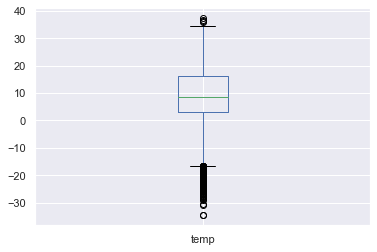

In [13]:
df.boxplot(column="temp");

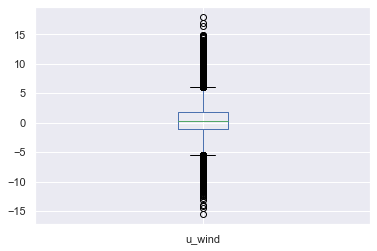

In [14]:
df.boxplot(column="u_wind");

In [16]:
df.to_csv('second_Train.csv')
df[:100].to_csv("second_Train_small.csv")